In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[ 0.29623319, -0.27007965,  0.09857045, -0.6467269 , -0.65929349,
        -1.0474381 ,  0.7956378 ,  0.68656785, -0.94845301,  1.08819974],
       [-0.54145251, -0.09045049,  0.03318556, -0.39892639, -0.43397022,
         0.13299571, -0.56759684,  0.56361143, -0.97137764, -0.8113498 ]])

In [4]:
test_Features[:2]

array([[-5.53682306e-01, -1.22899737e-01,  8.10516444e-04,
         2.17019247e-01,  3.92991420e-02,  6.21358878e-01,
         3.81833766e-01, -6.48158464e-01, -8.49600529e-02,
        -1.83219392e+00],
       [ 9.91905928e-01,  8.36737721e-01,  2.18051857e+00,
        -1.20851746e+00, -1.17147409e+00,  2.43612290e-01,
         1.06269715e+00,  9.41291412e-01, -9.74400288e-01,
         2.34040398e+00]])

In [5]:
train_Label[:4]

array([1, 1, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=30*7,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=30*6,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=30*5,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=30*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=30*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=30*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Conv1D(filters=30,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [23]:
model.add(MaxPooling1D(pool_size=1))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(10, activation='tanh'))

In [26]:
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 210)           420       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 210)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 180)           37980     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 180)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 150)           27150     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 150)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 120)           18120     
__________

In [28]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [29]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 18s 2ms/step - loss: 0.5541 - acc: 0.7377 - val_loss: 0.4534 - val_acc: 0.7948
Epoch 2/30
10194/10194 [==============================] - 11s 1ms/step - loss: 0.4134 - acc: 0.8135 - val_loss: 0.3985 - val_acc: 0.8254
Epoch 3/30
10194/10194 [==============================] - 12s 1ms/step - loss: 0.3678 - acc: 0.8433 - val_loss: 0.3752 - val_acc: 0.8376
Epoch 4/30
10194/10194 [==============================] - 14s 1ms/step - loss: 0.3513 - acc: 0.8531 - val_loss: 0.3640 - val_acc: 0.8423
Epoch 5/30
10194/10194 [==============================] - 16s 2ms/step - loss: 0.3439 - acc: 0.8531 - val_loss: 0.3559 - val_acc: 0.8470
Epoch 6/30
10194/10194 [==============================] - 15s 1ms/step - loss: 0.3367 - acc: 0.8586 - val_loss: 0.3526 - val_acc: 0.8482
Epoch 7/30
10194/10194 [==============================] - 15s 1ms/step - loss: 0.3346 - acc: 0.8610 - val_loss: 0.3522 - val_acc:

In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

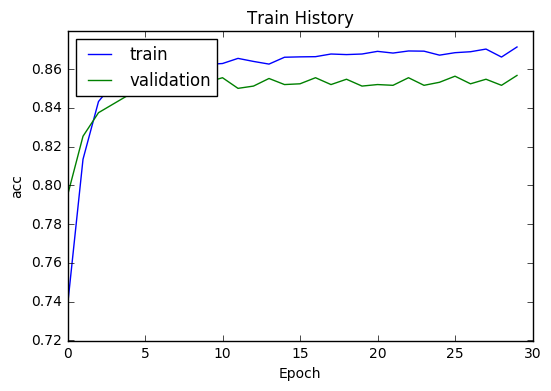

In [31]:
show_train_history(train_history,'acc','val_acc')

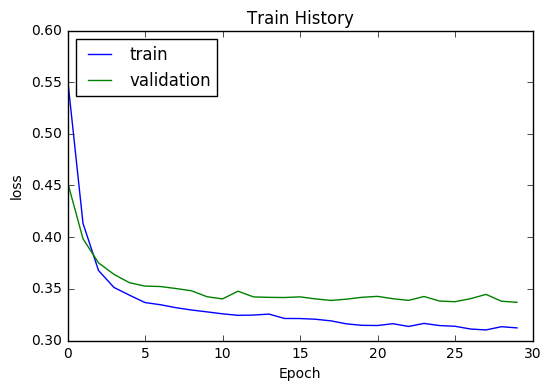

In [32]:
show_train_history(train_history,'loss','val_loss')

In [33]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 2s 330us/step


In [34]:
scores[1]

0.8690457224978826